In [1]:
import pandas as pd
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 
import dtwsom
import pickle
from sklearn.cluster import KMeans
from vectorizer import CharVectorizer
from array import array
import plotly.graph_objects as go
import seaborn as sn
from matplotlib.gridspec import GridSpec
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D
from bokeh.colors import RGB
from bokeh.io import curdoc, show, output_notebook
from bokeh.transform import factor_mark, factor_cmap
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, output_file

In [2]:
vectorizer = CharVectorizer(" abcdefghijklmnopqrstuvwxyz")
with open("words_alpha.txt", "r") as f:
    windows = f.readlines()
target_length = max(len(window) for window in windows)
matrix = vectorizer.transform(windows, target_length)
sys.stdout= open("result.txt","w")
print(matrix)
data_all_new = np.swapaxes(matrix, 1, 2)
matrix.shape

(300, 14, 27)

In [4]:
som_shape = (10,10)
som = dtwsom.MultiDtwSom(10, 10, data_all_new.shape[2], bands =data_all_new.shape[1], w = [0.25, 0.25, 0.25, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], sigma=1, learning_rate=0.5, random_seed=10,gl_const="sakoe_chiba", scr=60)
som.pca_weights_init(data_all_new)
som.train_random(data_all_new, 20, verbose=False)
weights = som.get_weights()

In [5]:
winner_coordinates = np.array([som.winner(x) for x in data_all_new]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
winner_coordinates.T

array([[5, 4],
       [5, 4],
       [7, 4],
       [7, 4],
       [8, 4],
       [7, 4],
       [7, 4],
       [8, 4],
       [7, 4],
       [5, 4],
       [5, 4],
       [5, 4],
       [6, 5],
       [5, 4],
       [5, 4],
       [7, 4],
       [7, 4],
       [5, 4],
       [7, 4],
       [6, 5],
       [5, 4],
       [6, 4],
       [5, 4],
       [6, 4],
       [6, 4],
       [5, 4],
       [7, 4],
       [5, 4],
       [5, 4],
       [6, 5],
       [7, 4],
       [8, 4],
       [6, 5],
       [6, 4],
       [7, 4],
       [5, 4],
       [6, 5],
       [5, 4],
       [7, 4],
       [5, 4],
       [6, 4],
       [7, 4],
       [5, 4],
       [7, 4],
       [6, 4],
       [7, 4],
       [5, 4],
       [5, 4],
       [7, 4],
       [5, 4],
       [5, 4],
       [6, 4],
       [7, 4],
       [7, 4],
       [7, 4],
       [7, 4],
       [6, 5],
       [6, 5],
       [7, 4],
       [6, 5],
       [6, 5],
       [5, 4],
       [5, 4],
       [5, 4],
       [7, 4],
       [5, 4],
       [5,

In [9]:
def print_cluster_winner_element(cluster_index, data_all_new):
    cluster_index = np.array(cluster_index)
    cluster_index = cluster_index.reshape(som_shape)
    for i in range(som_shape[0]):
        for j in range(som_shape[1]):
            vectorizer.reverse_transform(data_all_new[cluster_index[i,j]])


IndexError: index 8 is out of bounds for axis 1 with size 8

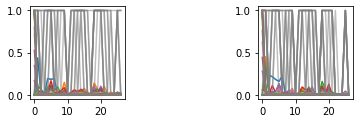

In [10]:
win_map = som.win_map(data_all_new)

plt.figure(figsize=(16, 16))
the_grid = GridSpec(8, 8)
for position in win_map.keys():
    plt.subplot(the_grid[6-position[1], position[0]])
    plt.plot(np.min(win_map[position], axis=0), color='gray', alpha=.5)
    plt.plot(np.mean(win_map[position], axis=0))
    plt.plot(np.max(win_map[position], axis=0), color='gray', alpha=.5)
plt.show()